# Week 1 - Fundamentals of Machine Learning

### Import required modules and load data

In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

fruits = pd.read_table('downloads/fruit_data_with_colors.txt')

In [4]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [5]:
fruits.shape

(59, 7)

### Create train-test split

(We intentionally use capital X but lower case y because y will be one dimensional and X could have more dimensions)

In [6]:
# Feature space
X = fruits[['mass', 'width', 'height', 'color_score']]

y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [7]:
# fruits.shape
# X_train.shape
# X_test.shape
# y_train.shape
# y_test.shape

# X_train
# X_test
# y_train
# y_test

### Examing and visualizing our data

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


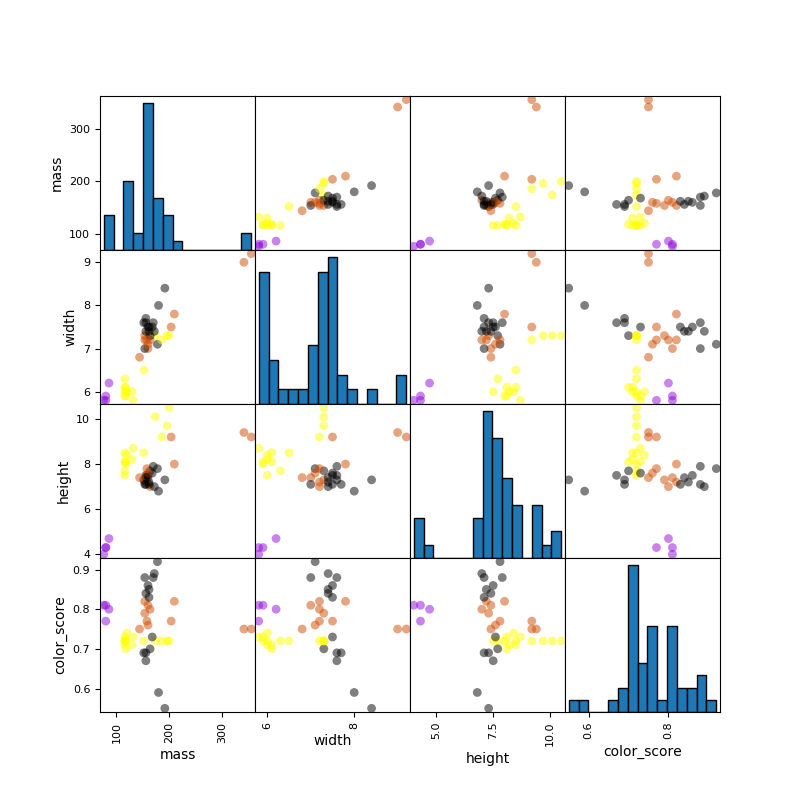

In [8]:
from matplotlib import cm

cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X_train, c=y_train, marker='o', s=40, hist_kwds={'bins': 15, 'edgecolor': 'black'}, figsize=(8, 8), cmap=cmap)

#### 3-dimensional visualization of clusters

<IPython.core.display.Javascript object>


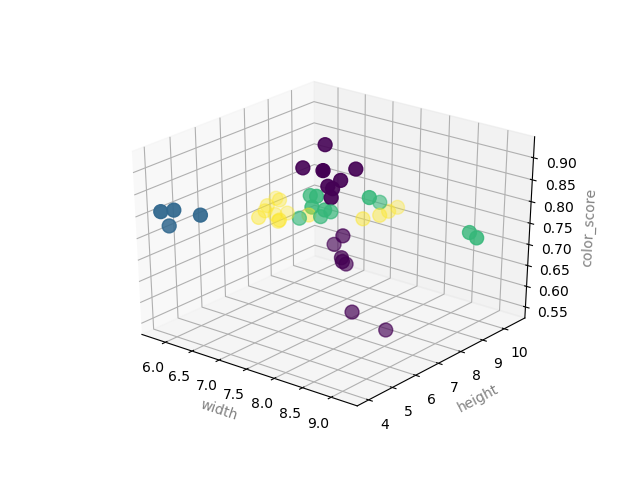

In [44]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c=y_train, marker='o', s=100)
ax.set_xlabel('width', color='gray')
ax.set_ylabel('height', color='gray')
ax.set_zlabel('color_score', color='gray')
plt.show()

### k-Nearest Neighbors Classification

(Note: we have already created the train-test split above)

In [9]:
# Create dictionary to make it easier to convert the output of the classifier into the fruit names
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

#### Create the classifier object

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

#### Train the classifier (fit the estimator) using the training data

In [11]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

#### Estimate the accuracy of classifier on test data

In [12]:
knn.score(X_test, y_test)

0.53333333333333333

#### Use trained k-NN classifier model for a new, unseen object

In [13]:
# Mass, width, height
fruit_prediction = knn.predict([[20, 4.3, 5.5, 0.80]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [18]:
fruit_prediction = knn.predict([[100, 6.3, 8.5, 0.80]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

### Plot the decision boundaries of the k-NN classifier

In [19]:
from adspy_shared_utilities import plot_fruit_knn

<IPython.core.display.Javascript object>


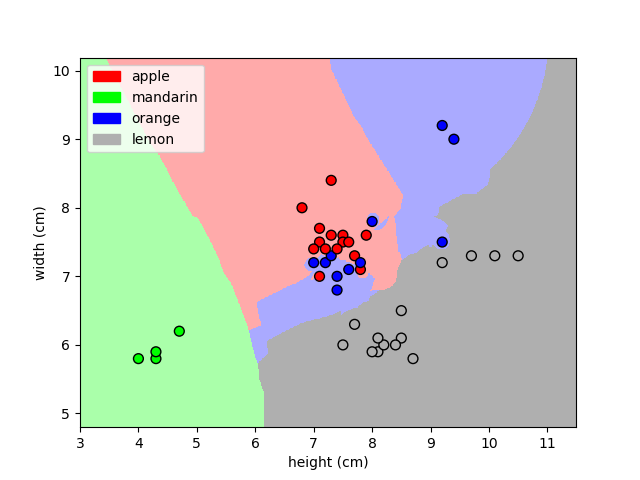

In [20]:
plot_fruit_knn(X_train, y_train, 5, 'distance')

#### Plot the accuracy of k-NN classifier with respect the k parameter 

<IPython.core.display.Javascript object>


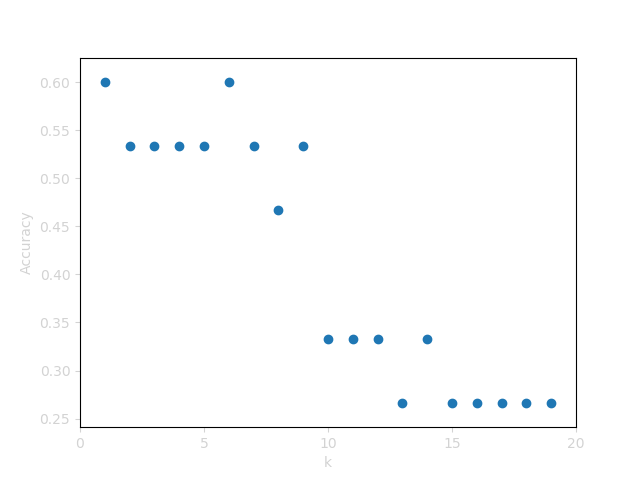

In [74]:
k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    
plt.figure()
plt.xlabel('k', color='lightgray')
plt.ylabel('Accuracy', color='lightgray')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.tick_params(axis='both', color='lightgray', labelcolor='lightgray')

plt.show()